# Part A


In [15]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

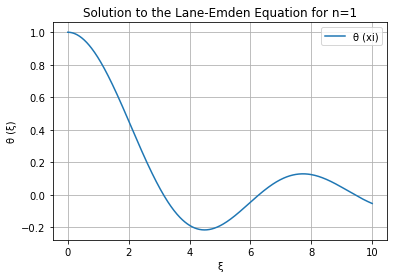

In [16]:
# Define the Lane-Emden equation for n=1
def lane_emden_eq(xi, y):
    # y[0] = theta, y[1] = dtheta/dxi
    # We need to return the derivatives: dtheta/dxi and d^2theta/dxi^2
    # The Lane-Emden equation is: 1/xi^2 * d/dxi(xi^2 * dtheta/dxi) + theta^n = 0
    # For n=1, it simplifies to: d^2theta/dxi^2 + 2/xi * dtheta/dxi + theta = 0
    dtheta_dxi = y[1]
    d2theta_dx2 = -2/xi * y[1] - y[0]
    return [dtheta_dxi, d2theta_dx2]

# Initial conditions
theta_0 = 1      # theta(0) = 1
dtheta_0 = 0     # dtheta/dxi(0) = 0
xi_0 = 1e-4      # Start integration at a small xi value to avoid division by zero at xi=0

# Integration span
xi_span = [xi_0, 10]  # xi will be in the range from xi_0 to 10

# Solve the Lane-Emden equation using the initial value problem solver
sol = solve_ivp(lane_emden_eq, xi_span, [theta_0, dtheta_0], t_eval=np.linspace(xi_0, 10, 500))

# Plot the solution
plt.plot(sol.t, sol.y[0], label='θ (xi)')
plt.xlabel('ξ')
plt.ylabel('θ (ξ)')
plt.title('Solution to the Lane-Emden Equation for n=1')
plt.legend()
plt.grid(True)
plt.show()

# Find the first zero of theta, which is the point where the pressure (and thus density) drops to 0
xi_1 = sol.t[np.argmin(np.abs(sol.y[0]))]  # This gives the approximate xi


In [18]:
# Calculate the total mass M of the star using the formula from part (a)
# Note: The values for rho_c (central density) and R (stellar radius) are not provided in the problem.
# Therefore, we will express M in terms of rho_c and R.

# Placeholder variables for rho_c and R. In practice, these would be determined from observations or additional constraints.
rho_c_placeholder = 1  # central density (this is a placeholder, not an actual value)
R_placeholder = 1       # stellar radius (this is a placeholder, not an actual value)

# Calculate the coefficient in front of rho_c and R^3 for the total mass formula
mass_coefficient = 4 * np.pi * xi1_squared_dtheta_dxi

# Total mass M of the star  in terms of rho_c and R using the coefficient
M = 4 * np.pi * rho_c * R**3 * xi1_squared_dtheta_dxi


NameError: name 'rho_c' is not defined

In [19]:
# Calculate -xi^2 * dtheta/dxi at xi_1
xi_1_index = np.argmin(np.abs(sol.y[0]))  # Index where theta is closest to zero
xi_1 = sol.t[xi_1_index]  # The value of xi at the first zero of theta
dtheta_dxi_at_xi_1 = sol.y[1][xi_1_index]  # The value of dtheta/dxi at xi_1
xi1_squared_dtheta_dxi = -xi_1**2 * dtheta_dxi_at_xi_1

xi_1, xi1_squared_dtheta_dxi


(9.418843486973948, 9.408137463761987)

In [20]:
#find the derivative at xi_1
index_xi_1 = np.argmin(np.abs(sol.y[0]))  # index where theta is closest to zero
xi_1 = sol.t[index_xi_1]  # value of xi at the first zero of theta
dtheta_dxi_at_xi_1 = sol.y[1][index_xi_1]  # derivative of theta at xi_1

# M is proportional to (-xi^2 * dtheta/dxi at xi_1)
# proportionality constant for M
M_proportionality_constant = -xi_1**2 * dtheta_dxi_at_xi_1

xi_1, dtheta_dxi_at_xi_1, M_proportionality_constant

(9.418843486973948, -0.10604946789066598, 9.408137463761987)

# Part B


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

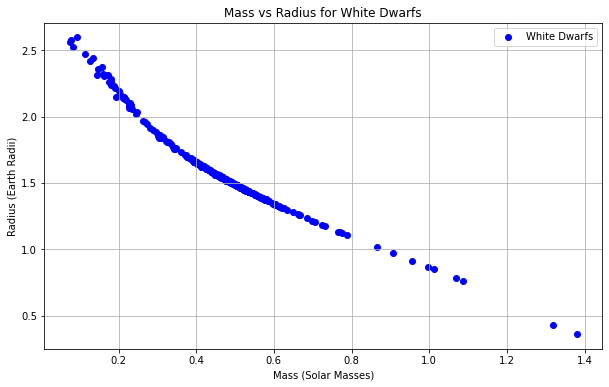

,wdid,logg,mass,g,mass_g,radius_cm,radius_earth
0,2MASS J10145164+4541479,7.455,0.301,2.851018e+07,5.986890e+32,1.183869e+09,1.856146
1,2QZ J114947.9-012045,8.497,0.907,3.140509e+08,1.804023e+33,6.191899e+08,0.970806
2,GJ 1179 B,7.783,0.454,6.067363e+07,9.030060e+32,9.966626e+08,1.562633
3,Gaia DR2 1007682723024253184,7.885,0.510,7.673615e+07,1.014390e+33,9.393022e+08,1.472699
4,Gaia DR2 1010300965150157824,8.035,0.600,1.083927e+08,1.193400e+33,8.572271e+08,1.344016


In [30]:
# Load the CSV data
path = 'white_dwarf_data.csv'
df= pd.read_csv(path)

# Constants needed for conversion
G = 6.67430e-8  # Gravitational constant in CGS units (cm^3 g^-1 s^-2)
M_sun = 1.989e33  # Mass of the sun in grams
R_earth = 6.3781e8  # Radius of the Earth in cm

# Convert log(g) to g
df['g'] = 10**df['logg']

# Convert mass to grams
df['mass_g'] = df['mass'] * M_sun

# Calculate radius in cm using the formula g = G * M / R^2
df['radius_cm'] = np.sqrt(G * df['mass_g'] / df['g'])

# Convert radius from cm to Earth radii
df['radius_earth'] = df['radius_cm'] / R_earth

# Now we can plot the Mass vs Radius
plt.figure(figsize=(10,6))
plt.scatter(df['mass'], df['radius_earth'], color='blue', label='White Dwarfs')
plt.xlabel('Mass (Solar Masses)')
plt.ylabel('Radius (Earth Radii)')
plt.title('Mass vs Radius for White Dwarfs')
plt.legend()
plt.grid(True)
plt.show()

df.head()

# Part C

In [19]:
from scipy.optimize import curve_fit


/Users/aleynacakir/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


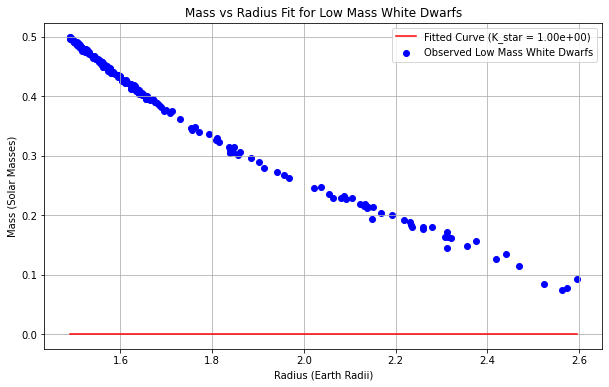

In [32]:
# Given values from the problem statement
q = 3  # suggested integer value
n_k = q / (5 - q)  # Calculate n_k using the relation provided
G = 6.67430e-8  # Gravitational constant in CGS units (cm^3 g^-1 s^-2)
M_sun = 1.989e33  # Mass of the sun in grams
R_sun = 6.955e10  # Radius of the sun in cm

# Define the power-law function for fitting
def mass_radius_relation(R, K_star):
    # M(R) = K_star * R^(3-n_k) where n_k is already known
    # Convert R from Earth radii to cm
    R_cm = R * R_earth
    # Convert M from solar masses to grams, solve for M and then convert back to solar masses
    M = K_star * R_cm ** (3 - n_k)
    return M / M_sun

# Perform the fit on the low mass WDs
# Filter the data for low mass WDs (let's assume 'low mass' means M < 0.5 M_sun for this case)
low_mass_wds = df[df['mass'] < 0.5]

# We'll use the radius in Earth radii as our x data and the mass as our y data
xdata = low_mass_wds['radius_earth']
ydata = low_mass_wds['mass']

# Perform the curve fit
params, cov = curve_fit(mass_radius_relation, xdata, ydata)

# Extract the K_star parameter from the fitting parameters
K_star_fit = params[0]

# Now let's plot the fitted curve over the data
R_values = np.linspace(min(xdata), max(xdata), 100)
M_fit = mass_radius_relation(R_values, K_star_fit)

# Complete the plotting
plt.figure(figsize=(10,6))
plt.scatter(xdata, ydata, color='blue', label='Observed Low Mass White Dwarfs')
plt.plot(R_values, M_fit, color='red', label=f'Fitted Curve (K_star = {K_star_fit:.2e})')
plt.xlabel('Radius (Earth Radii)')
plt.ylabel('Mass (Solar Masses)')
plt.title('Mass vs Radius Fit for Low Mass White Dwarfs')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Constants needed for conversion
G = 6.67430e-8  # Gravitational constant in CGS units (cm^3 g^-1 s^-2)
M_sun = 1.989e33  # Mass of the sun in grams
R_earth = 6.3781e8  # Radius of the Earth in cm
R_sun = 6.955e10  # Radius of the sun in cm

# Convert log(g) to g
df['g'] = 10**df['logg']

# Convert mass to grams
df['mass_g'] = df['mass'] * M_sun

# Calculate radius in cm using the formula g = G * M / R^2
df['radius_cm'] = np.sqrt(G * df['mass_g'] / df['g'])

# Convert radius from cm to Earth radii
df['radius_earth'] = df['radius_cm'] / R_earth

# Filter the data for low mass WDs (let's assume 'low mass' means M < 0.5 M_sun for this case)
low_mass_wds = df[df['mass'] < 0.5]

# We'll use the radius in Earth radii as our x data and the mass as our y data
xdata = low_mass_wds['radius_earth']
ydata


0      0.301
2      0.454
5      0.395
6      0.456
7      0.403
       ...  
369    0.305
370    0.476
373    0.464
374    0.395
376    0.263
Name: mass, Length: 230, dtype: float64

# Part D

In [54]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


In [57]:

# Load the data from the CSV file
df = pd.read_csv('white_dwarf_data.csv')

# Constants from the problem statement
G = 6.67430e-8  # Gravitational constant in CGS units
K = 1.0  # Assumed to be 1 for simplicity, actual value would come from the solution of part (c)
q = 3  # from part (c)
n_k = q / (5 - q)  # from part (c)
D_guess = 2e5  # Initial guess for D

# Define the mass-radius relation using the given equation of state
def mass_radius_relation(R, D):
    return K * D * R**(3 - n_k)

low_mass_wds = df[df['mass'] < 0.5]

# We'll use the radius in Earth radii as our x data and the mass as our y data
xdata = low_mass_wds['radius_earth']
ydata = low_mass_wds['mass']

#  a range of radii
R_values = np.linspace(df['radius_earth'].min(), df['radius_earth'].max(), 100)

#  masses for these radii using the mass-radius relation and the initial D guess
M_values = mass_radius_relation(R_values, D_guess)

# Interpolate the calculated masses over the radii
interp_masses = interp1d(R_values, M_values, kind='cubic')

#  this interpolation to estimate masses for all radii in the dataset
estimated_masses = interp_masses(df['radius_earth'])

# Plot the observed masses versus the estimated masses for comparison
plt.figure(figsize=(10, 6))
plt.scatter(df['radius_earth'], df['mass'], color='blue', label='Observed Masses')
plt.plot(R_values, estimated_masses, color='red', label='Estimated Masses')
plt.xlabel('Radius (Earth Radii)')
plt.ylabel('Mass (Solar Masses)')
plt.title('Mass-Radius Relation for White Dwarfs')
plt.legend()
plt.grid(True)
plt.show()



KeyError: 'radius_earth'

# Part E